# Data Analysis of Iris Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets

### Loading dataset

In [2]:
# Loading dataset from csv file
df=pd.read_csv('iris.csv')
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Summary of dataset

In [4]:
# Short summary
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Summaries of variables

In [5]:
series_sepal_length=df['sepal_length_in_cm']
series_sepal_length.describe().to_csv('sepal_length')

In [6]:
series_sepal_width=df['sepal_width_in_cm']
series_sepal_width.describe().to_csv('sepal_width')

In [7]:
series_petal_length=df['petal_length_in_cm']
series_petal_length.describe().to_csv('petal_length')

In [8]:
series_petal_width=df['petal_width_in_cm']
series_petal_width.describe().to_csv('petal_width')

Summaries of variables are saved in the folder summaries_variables

### Histograms of morphological values

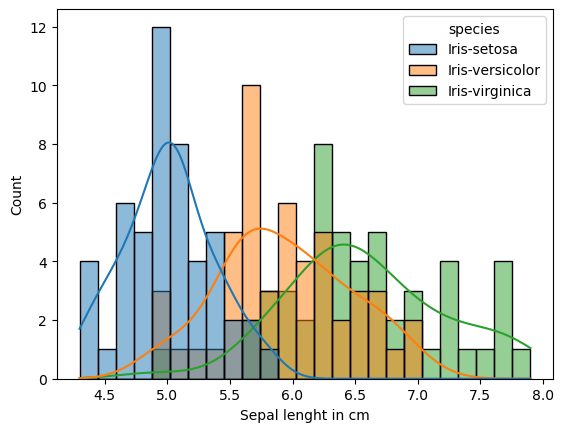

In [9]:
plot=sns.histplot(df, x=df['sepal_length_in_cm'], hue=df['species'], kde=True, bins=25)
plt.xlabel('Sepal lenght in cm')
plt.savefig('sepal_lenght_hist.png')

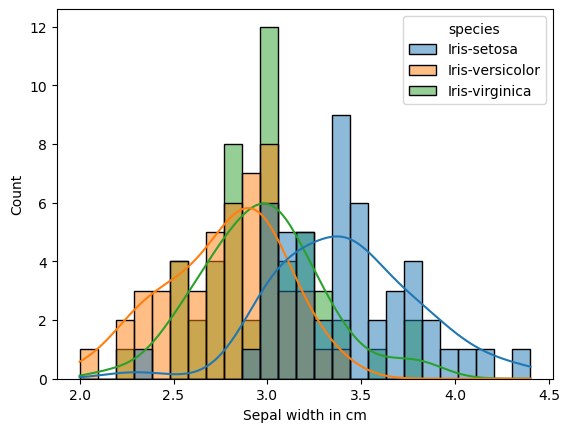

In [10]:
sns.histplot(df, x=df['sepal_width_in_cm'], hue=df['species'], kde=True, bins=25)
plt.xlabel('Sepal width in cm')
plt.savefig('sepal_width_hist.png')

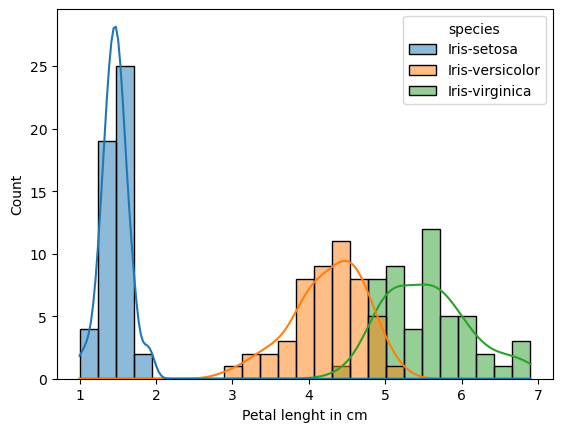

In [11]:
sns.histplot(df, x=df['petal_length_in_cm'], hue=df['species'], kde=True, bins=25)
plt.xlabel('Petal lenght in cm')
plt.savefig('petal_lenght_hist.png')

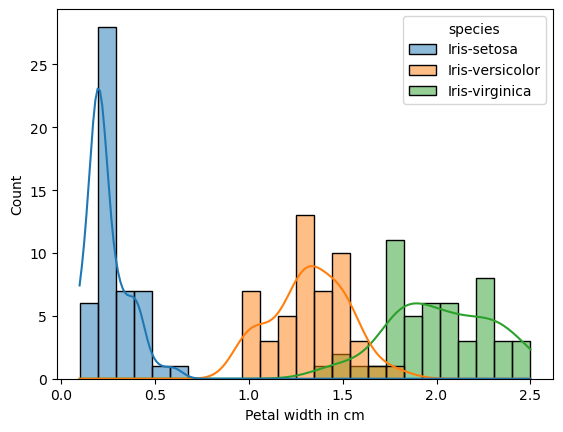

In [12]:
sns.histplot(df, x=df['petal_width_in_cm'], hue=df['species'], kde=True, bins=25)
plt.xlabel('Petal width in cm')
plt.savefig('petal_width_hist.png')

According to histograms, flowers of *Iris Virginica* and *Iris Versicolor* share similar values, with mean value for *Iris Virginica's* flowers higher in any category than for flowers of *Iris Versicolor*. Flowers of *Iris Setosa* differ from these species with lower values for petal length, petal width, sepal lenght, but higher values for sepal width than for *Iris Virginica* and *Iris Versicolor*. All histograms are saved in the folder histograms_variables.

### Scatterplots

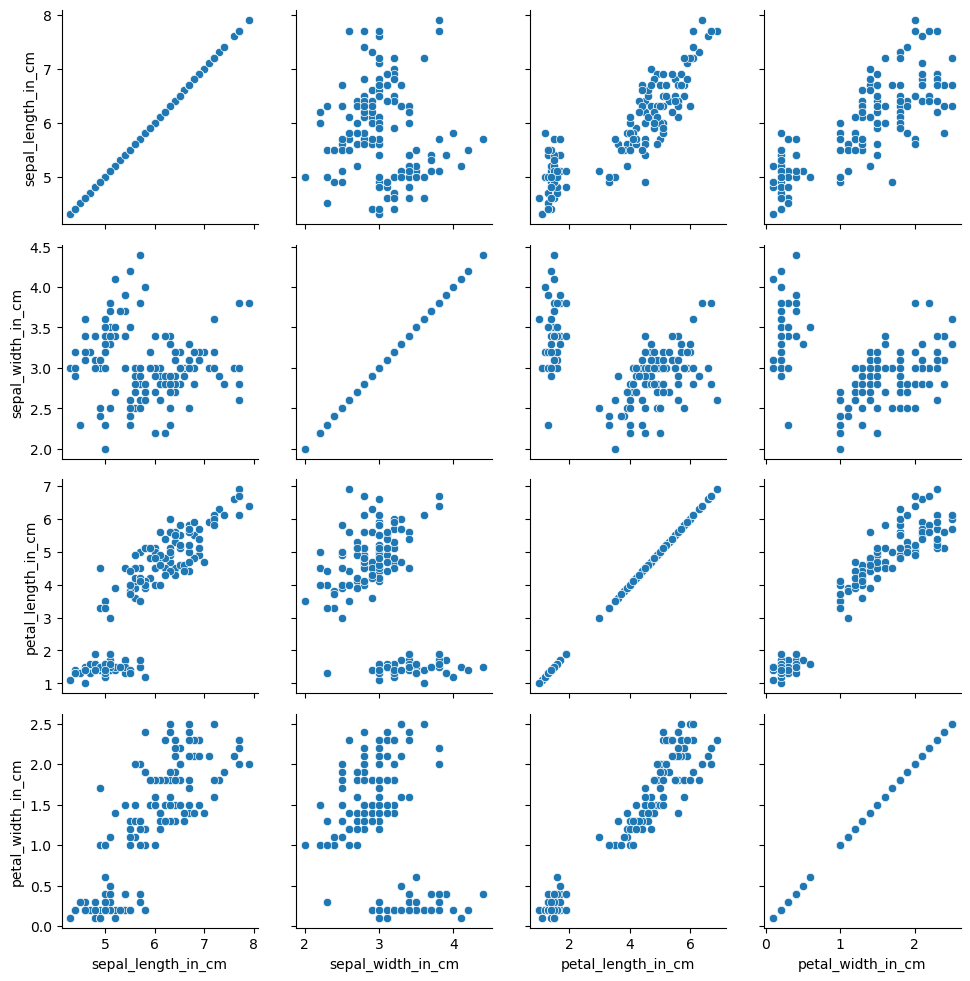

In [13]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)


Values of *Iris Setosa* and *Iris Versicolor* created coupled clusters in plots, while values for flowers of *Iris Setosa* created detached clusters  .

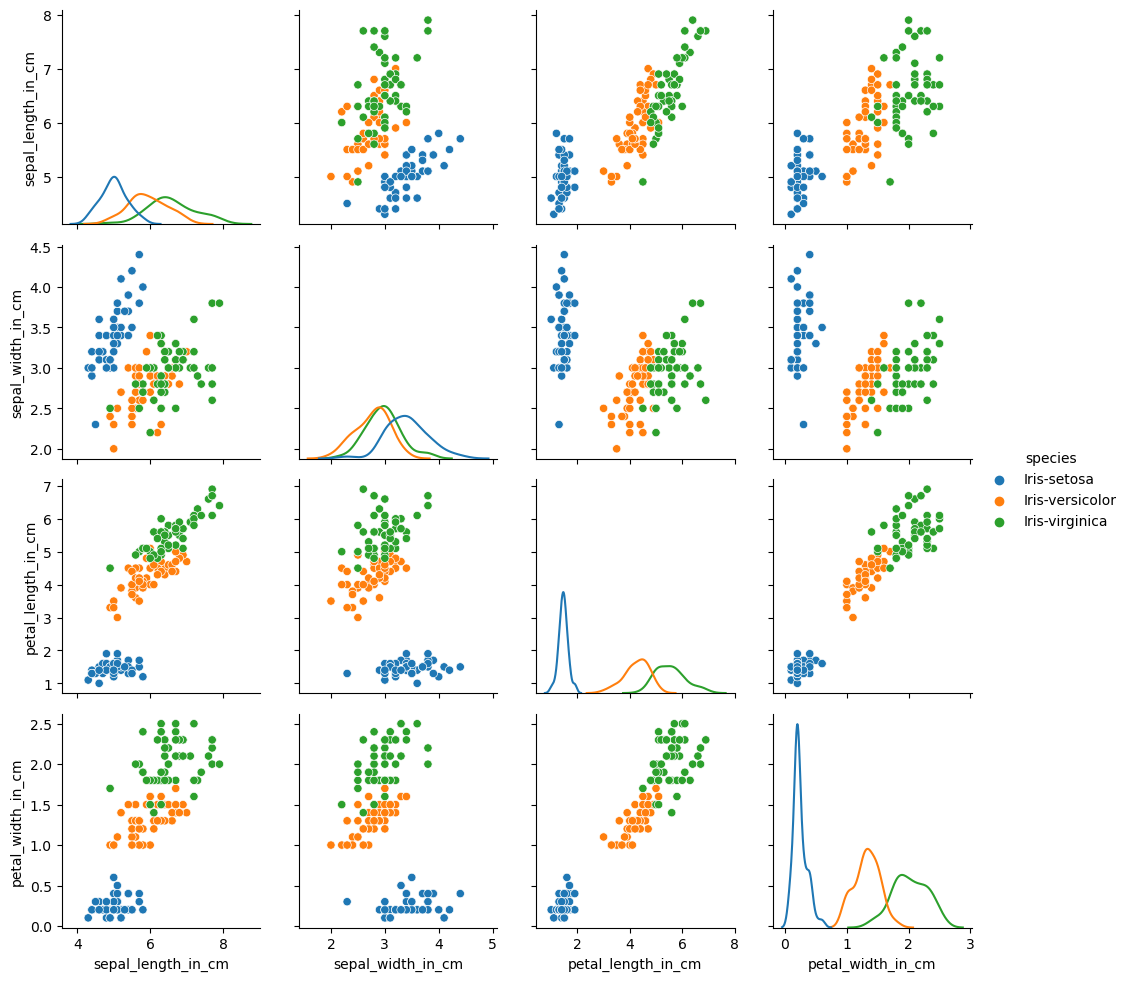

In [14]:
g = sns.PairGrid(df, hue="species")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Correlation matrix

<Axes: >

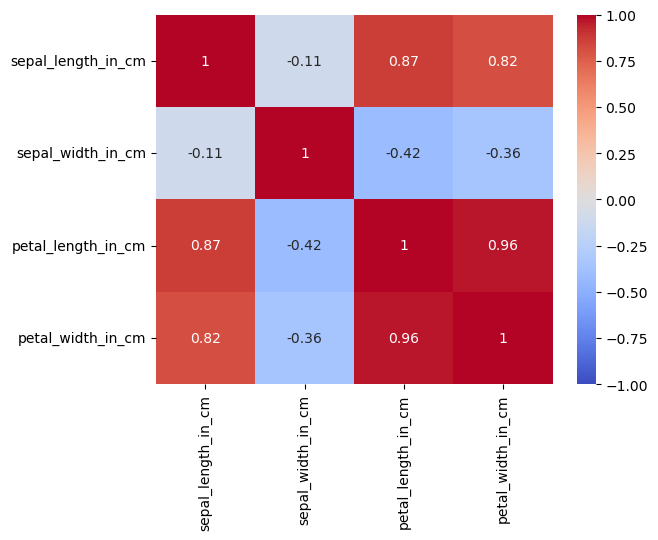

In [5]:
# default method of corr() is pearson method
corr_coef=df.corr(numeric_only=True)
sns.heatmap(corr_coef, annot=True, cmap='coolwarm', vmin=-1,vmax=1)

Values above 0.59 can be considered as "solid" correlation. Petal length is strongly correlated with petal width along with sepal length, while sepal width is not strongly correlated with any other variable.

### Classification

Aim of this dataset is to find and test various matematical models to properly sorted records just with 4 atributs. Now I try 3 different models to find out which is the most accurate. 

In [9]:
# creating x dataset and y series
x=df.drop(columns=['species'])
y=df['species']

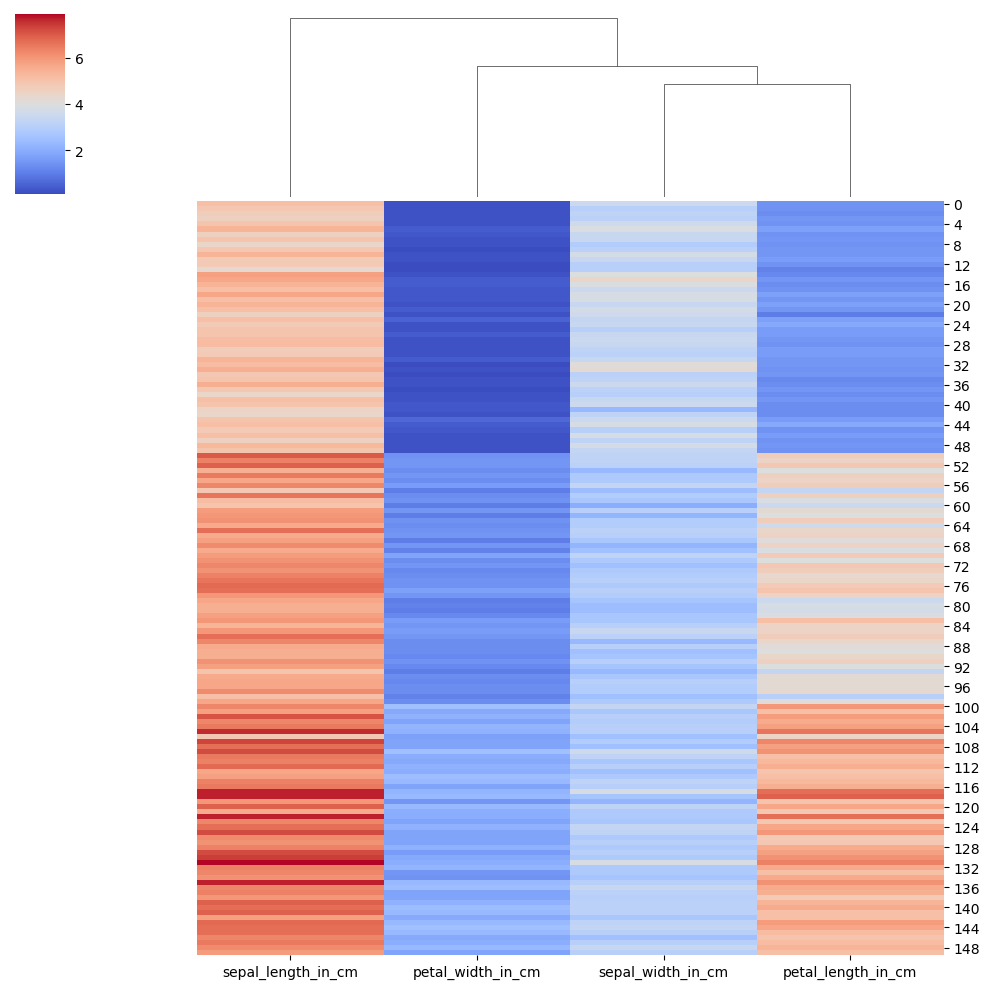

In [10]:
# Dendrogram
sns.clustermap( x , cmap='coolwarm', row_cluster=False )

Every numerical value in the dataset has its 'color' now in the cool-warm scale. I left it without sorting records into clusters. We can see distinctive 3 clusters for each 3 species between indexes, especially, in the column petal_width_in_cm.

In [17]:
encode=LabelEncoder()
y=encode.fit_transform(y)

In [18]:
# Spliting into test and train sets
train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.3)

In [19]:
# linear discriminant analysis
LDA=LinearDiscriminantAnalysis()
model1=LDA.fit(train_x, train_y)
f=RepeatedStratifiedKFold()
score=cross_val_score(model1, test_x, test_y,scoring='accuracy',cv=f)
print(np.mean(score))

0.9822222222222223


In [20]:
# logistic regression
LR=LogisticRegression()
model2=LR.fit(train_x, train_y)
print('Accuracy', model2.score(test_x, test_y))


Accuracy 0.9777777777777777


In [21]:
# decision tree classifier
dt = DecisionTreeClassifier()
model3=dt.fit(train_x,train_y)
print("Accuracy: ", model3.score(test_x,test_y))




Accuracy:  0.9555555555555556


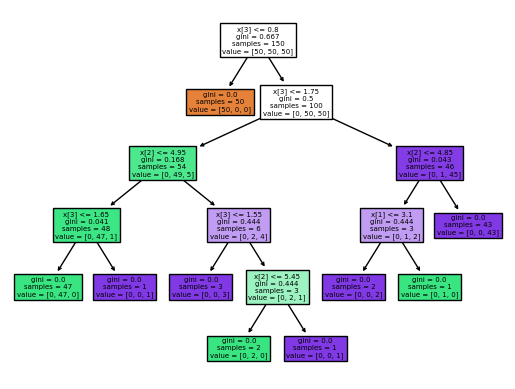

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
tree.plot_tree(clf, filled=True)
plt.savefig('dtc.png')

The linear discriminant analysis showed as the most accurate.


***
### End